**EDA ON SPOTIFY SONG STREAMS ** 
By Deven Marne

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as  plt
import seaborn as sns
plt.style.use('ggplot')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv


# **Loading the dataset**
Load the data and import the libraries.

In [20]:
df=pd.read_csv('../input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv')

# **Data Cleaning:**

1.Deleting redundant columns.

2.Renaming the columns.

3.Dropping duplicates.

4.Cleaning individual columns.

5.Remove the NaN values from the dataset


In [3]:
df.shape

(953, 25)

In [39]:
df.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
danceability_%,953.0,66.969570,14.630610,23.0,57.0,69.0,78.0,96.0
energy_%,953.0,64.279119,16.550526,9.0,53.0,66.0,77.0,97.0


In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [5]:
df[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
        'in_shazam_charts', 'danceability_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%']] #sorting out the nesscesary columns

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_shazam_charts,danceability_%,energy_%,acousticness_%,instrumentalness_%,liveness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,826,80,83,31,0,8
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,382,71,74,7,0,10
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,949,51,53,17,0,31
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,548,55,72,11,0,11
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,425,65,80,14,63,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,0,60,39,57,0,8
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,0,42,24,83,1,12
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,0,80,67,4,0,8
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,0,82,77,8,0,12


In [ ]:
df = df[['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
        'danceability_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%']].copy() 

In [22]:
duplicates = df.duplicated()
print(df[duplicates])
#no duplicates found

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%, cover_url]
Index: []

[0 rows x 25 columns]


In [41]:
df.isna().sum()


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_shazam_charts        50
danceability_%           0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
dtype: int64

In [ ]:
df.drop(columns=['in_shazam_charts'], inplace=True)


In [43]:
df.isna().sum()


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
danceability_%          0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
dtype: int64

In [8]:
df.shape

(953, 17)

In [15]:
pd.to_int64=df['released_year']
pd.to_int64=df['released_month']
pd.to_int64=df['released_day']
pd.to_int64=df['streams']

# **Data Visualization**
Using plots to find relations between the features.

In [18]:
df['released_year'].min()

1930

In [19]:
df['released_year'].value_counts()

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

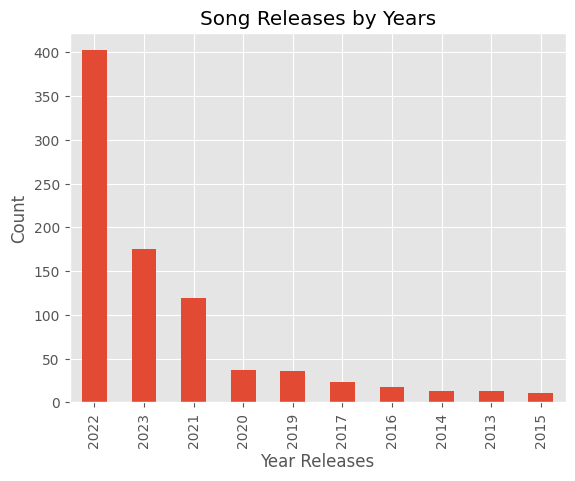

In [22]:
ax=df['released_year'].value_counts().head(10).plot(kind='bar',title='Song Releases by Years')
ax.set_xlabel('Year Releases')
ax.set_ylabel('Count')

In [34]:
df['released_month'].value_counts().sort_index()

released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: count, dtype: int64

Text(0, 0.5, 'Count')

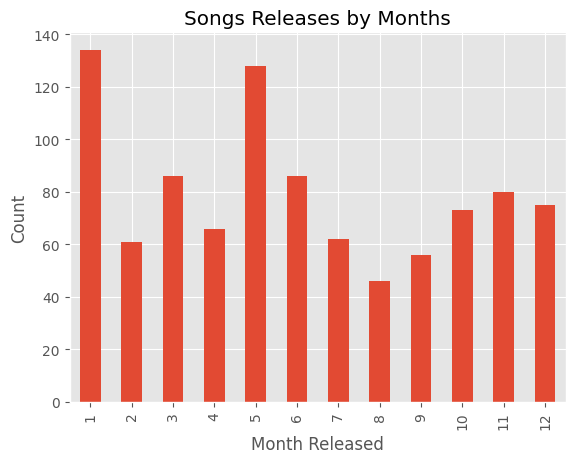

In [35]:
ax1=df['released_month'].value_counts().sort_index().plot(kind='bar',title='Songs Releases by Months')
ax1.set_xlabel('Month Released')
ax1.set_ylabel('Count')

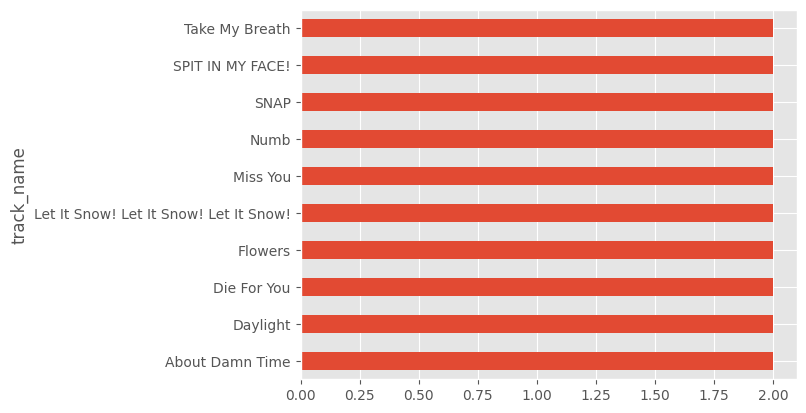

In [11]:
ax2=df['track_name'].value_counts().head(10).sort_index().plot(kind='barh')

<Axes: ylabel='artist(s)_name'>

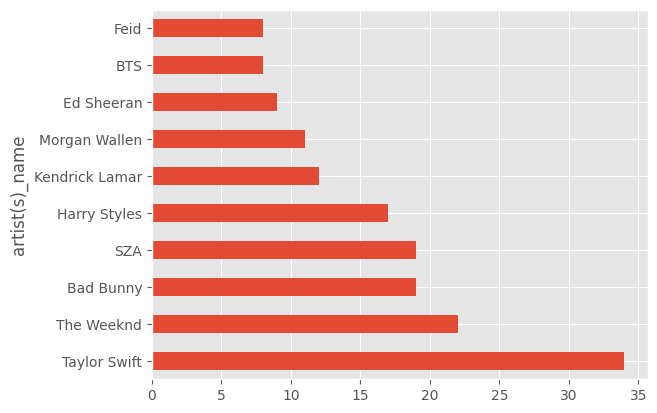

In [13]:
df['artist(s)_name'].value_counts().head(10).plot(kind='barh')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


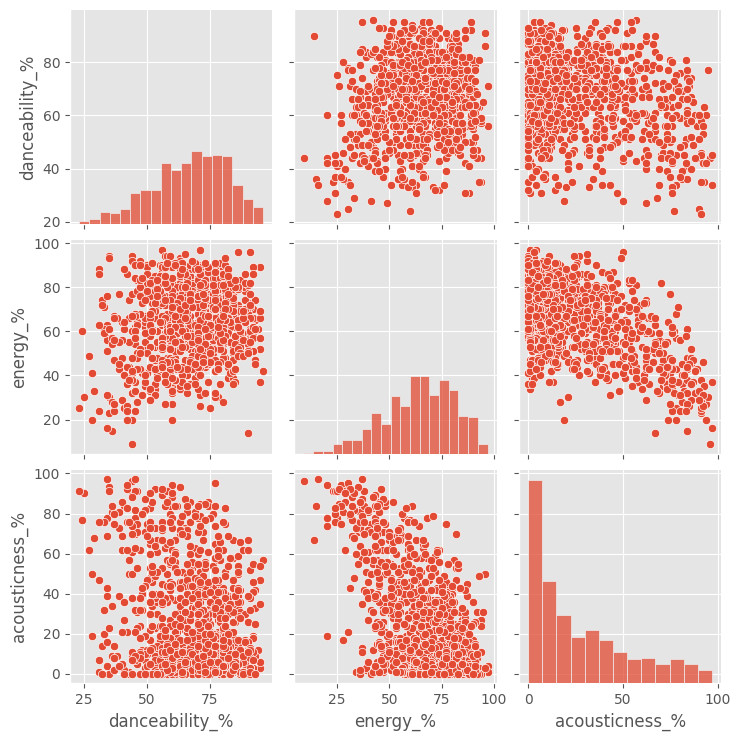

In [25]:
sns.pairplot(df[['danceability_%', 'energy_%', 'acousticness_%']])


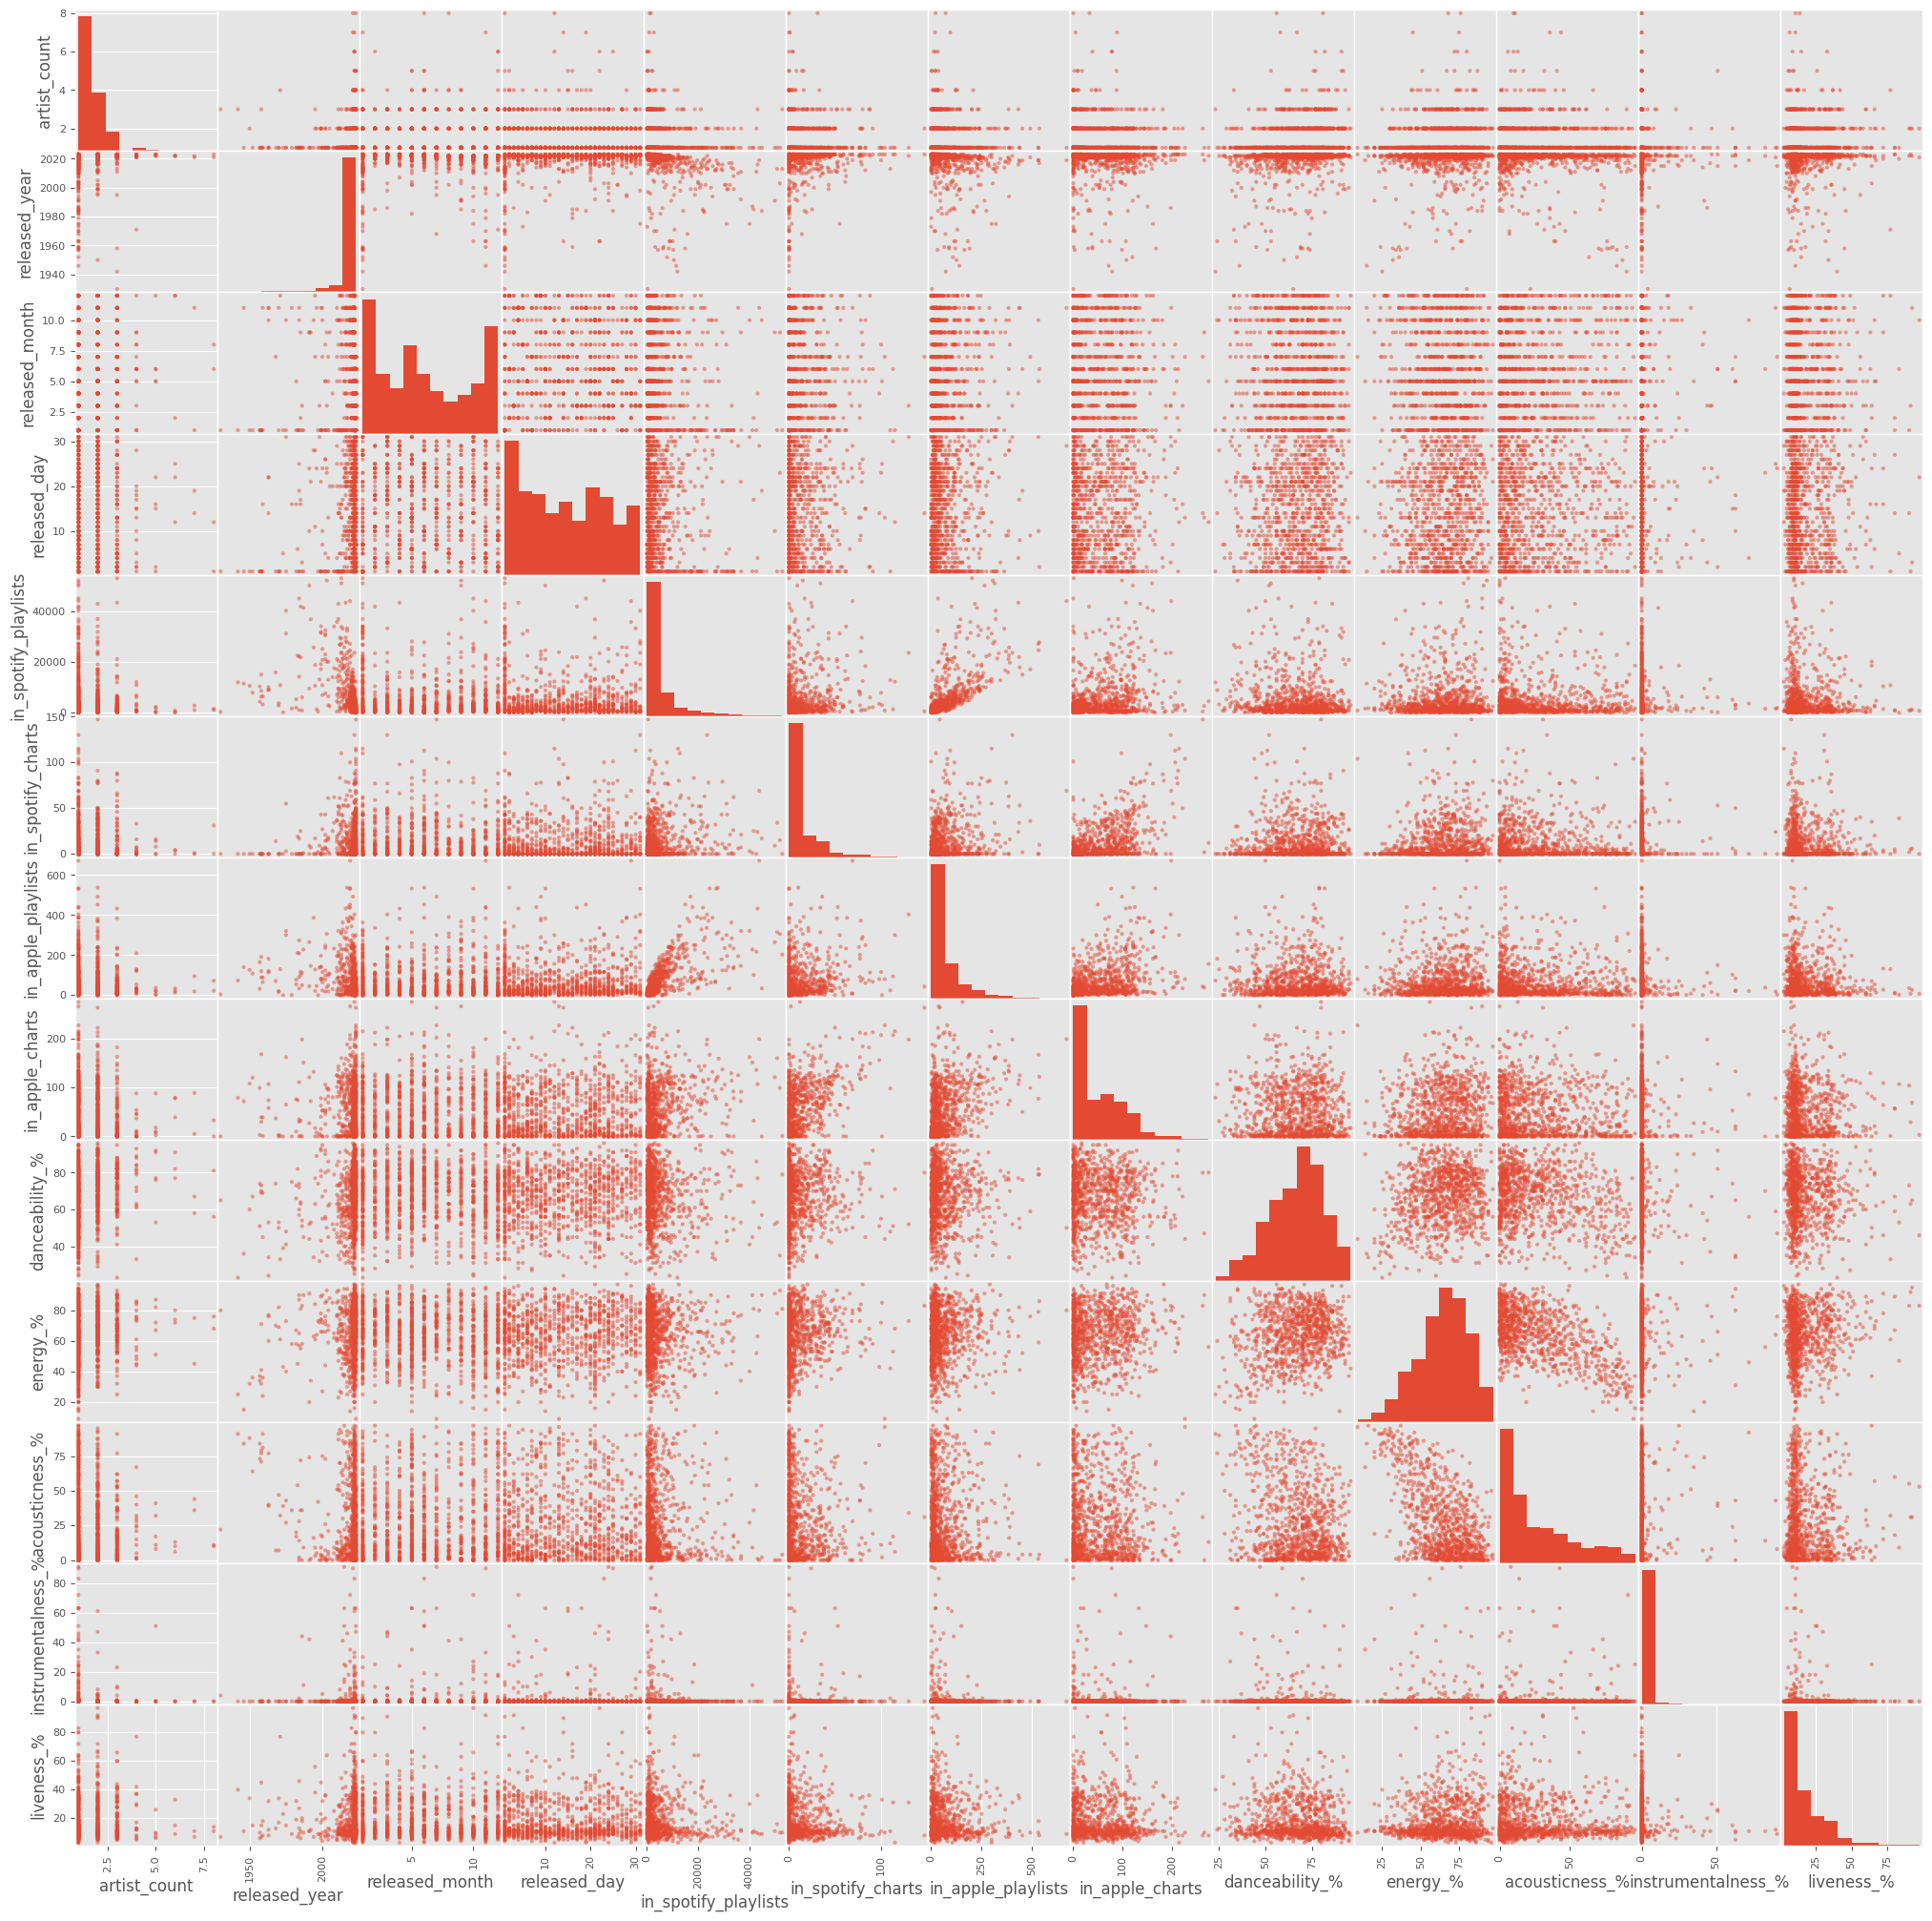

In [48]:
#Scatter matrix of Cleaned Data
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))